#### NOTE: This coursework performs some basic data preprocessing and analysis tasks using NumPy, Pandas and Matplotlib

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load in data
bank = pd.read_csv("/Users/Alexkilledme/Desktop/2018SQ/CSC478 - Machine Learning/hw/bank_data.csv", sep=',',index_col=0)
bank.shape

(600, 11)

In [3]:
# get basic view
bank.head(10)

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
ID12106,57,37869.60,2,FEMALE,TOWN,YES,NO,YES,YES,NO,YES
ID12107,22,8877.07,0,MALE,RURAL,NO,NO,NO,YES,NO,YES
ID12108,58,24946.60,0,MALE,TOWN,YES,YES,YES,YES,NO,NO
ID12109,37,25304.30,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO


### 1. Explore the general characteristics of the data (statistics, distributions,etc.)**

In [4]:
## numeric varaibles exploration
# basic statistics of numeric varaibles
bank.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


Text(0,0.5,u'Count')

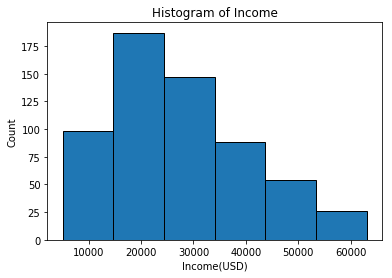

In [5]:
#distribution of income
bank["income"].plot(kind="hist", bins=6, edgecolor = 'k', title = 'Histogram of Income')
plt.xlabel('Income(USD)')
plt.ylabel('Count')

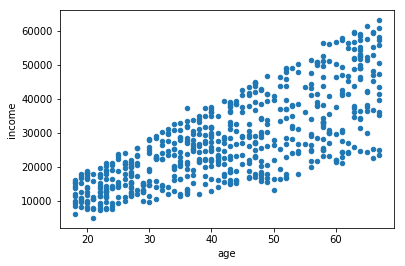

In [6]:
#scatterplot of income and age
bank.plot(x="age", y="income", kind="scatter")

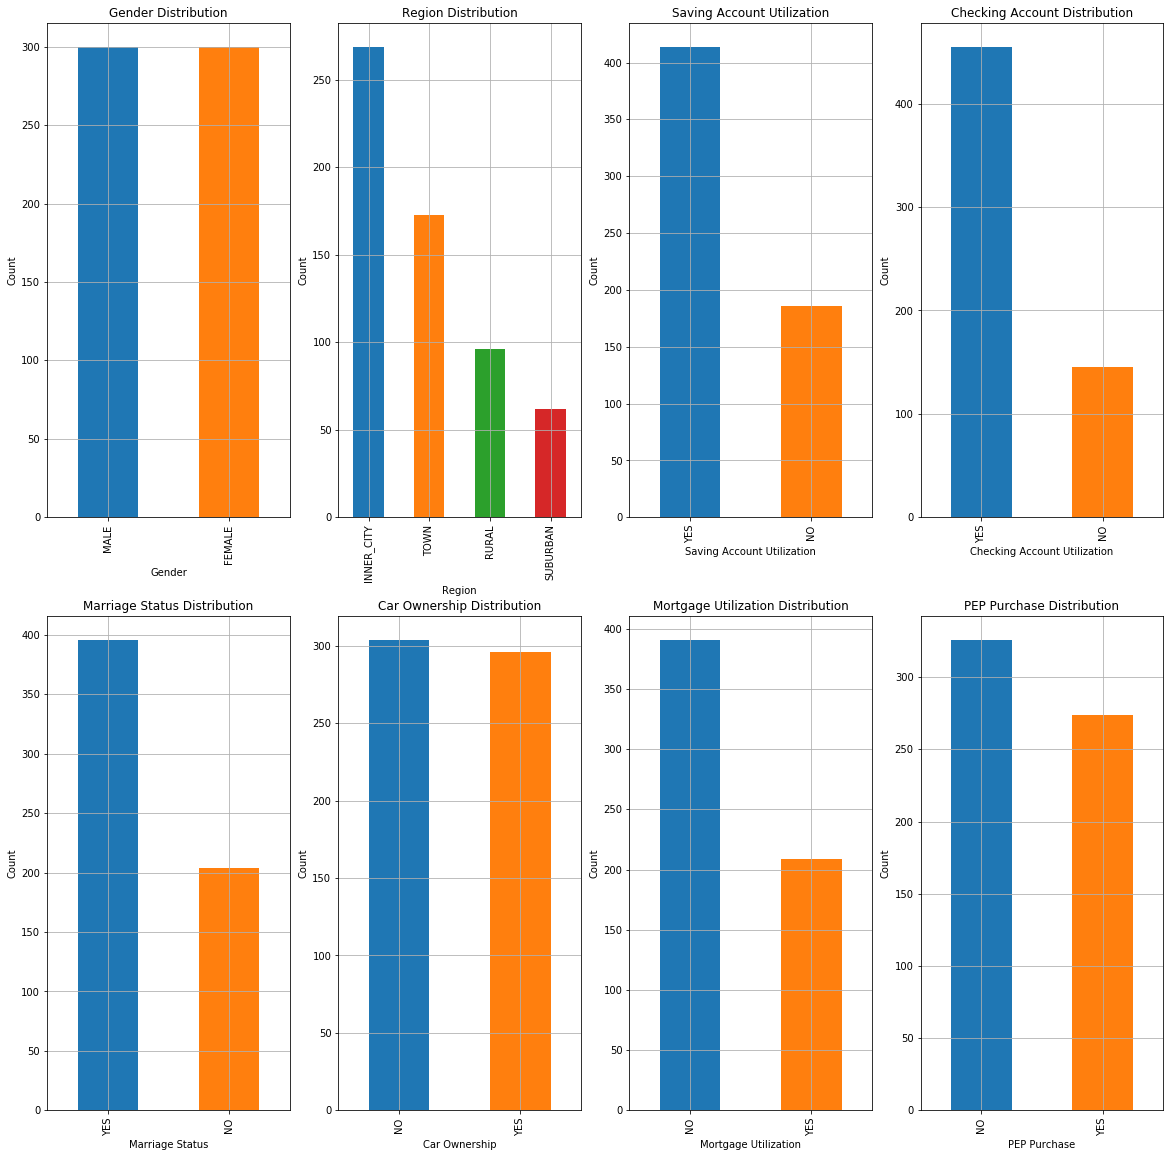

In [7]:
## categorical variables exploration
#distribution of categorical variables
temp1 = bank["gender"].value_counts()
temp2 = bank["region"].value_counts()
temp3 = bank["savings_acct"].value_counts()
temp4 = bank["current_acct"].value_counts()
temp5 = bank["married"].value_counts()
temp6 = bank["car"].value_counts()
temp7 = bank["mortgage"].value_counts()
temp8 = bank["pep"].value_counts()

plt.tight_layout(h_pad=2, w_pad=2)
fig = plt.figure(num = 8, figsize=(20,20))
ax1 = fig.add_subplot(241)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count')
ax1.set_title("Gender Distribution")
temp1.plot(kind='bar', grid = True)

ax2 = fig.add_subplot(242)
ax2.set_xlabel('Region')
ax2.set_ylabel('Count')
ax2.set_title("Region Distribution")
temp2.plot(kind='bar', grid = True)

ax3 = fig.add_subplot(243)
ax3.set_xlabel('Saving Account Utilization')
ax3.set_ylabel('Count')
ax3.set_title("Saving Account Utilization")
temp3.plot(kind='bar', grid = True)

ax4 = fig.add_subplot(244)
ax4.set_xlabel('Checking Account Utilization')
ax4.set_ylabel('Count')
ax4.set_title("Checking Account Distribution")
temp4.plot(kind='bar', grid = True)

ax5 = fig.add_subplot(245)
ax5.set_xlabel('Marriage Status')
ax5.set_ylabel('Count')
ax5.set_title("Marriage Status Distribution")
temp5.plot(kind='bar', grid = True)

ax6 = fig.add_subplot(246)
ax6.set_xlabel('Car Ownership')
ax6.set_ylabel('Count')
ax6.set_title("Car Ownership Distribution")
temp6.plot(kind='bar', grid = True)

ax7 = fig.add_subplot(247)
ax7.set_xlabel('Mortgage Utilization')
ax7.set_ylabel('Count')
ax7.set_title("Mortgage Utilization Distribution")
temp7.plot(kind='bar', grid = True)

ax8 = fig.add_subplot(248)
ax8.set_xlabel('PEP Purchase')
ax8.set_ylabel('Count')
ax8.set_title("PEP Purchase Distribution")
temp8.plot(kind='bar', grid = True)

From numeric variable exploration above, we see that: <br>

- The distribution of income is skew left skew and income of most of participants are under 30000<br>
- There is a positive linear relationship between income and age according to the scatterplot<br>

From categorical variable exploration above, we know that: <br>

- The number of men and women are the same in this dataset.<br>
- Many of them are from innner city and most of them have both saving and checking account.<br>
- About two-third of them get married and don't have mortgage.<br>
- The number of people that have a car and don't have a car seems don't have a big difference.<br>
- More than a half of peope have didn't buy PEP

### 2. Compare and contrast the subsets of customers who buy and don't buy the PEP. Compute summaries (as in part 1) of the selected data with respect to all other attributes. Can you observe any significant differences between these segments of customers? Discuss your observations.

In [8]:
#Descriptive statistics for PEP
pep_df = bank.loc[bank['pep'] == 'YES']
no_pep_df = bank.loc[bank['pep'] == 'NO']
print("Descriptive statistics for PEP = YES")
display(pep_df.describe())
print("Descriptive statistics for PEP = NO")
display(no_pep_df.describe())

Descriptive statistics for PEP = YES


,age,income,children
count,274.000000,274.000000,274.000000
mean,45.127737,30644.919453,0.945255
std,14.327991,13609.613043,0.860571
min,18.000000,7756.360000,0.000000
25%,34.000000,19639.475000,0.000000
50%,45.000000,28080.050000,1.000000
75%,58.000000,38458.350000,1.000000
max,67.000000,63130.100000,3.000000


Descriptive statistics for PEP = NO


,age,income,children
count,326.000000,326.000000,326.000000
mean,40.098160,24900.953374,1.067485
std,14.123506,11661.123422,1.195524
min,18.000000,5014.210000,0.000000
25%,27.000000,15366.475000,0.000000
50%,40.000000,23105.000000,0.000000
75%,51.000000,31210.900000,2.000000
max,67.000000,61554.600000,3.000000


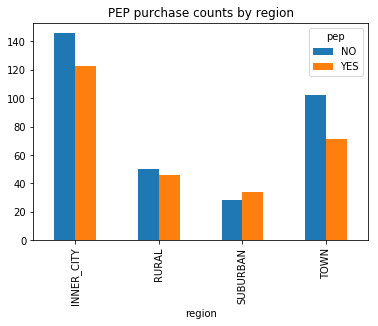

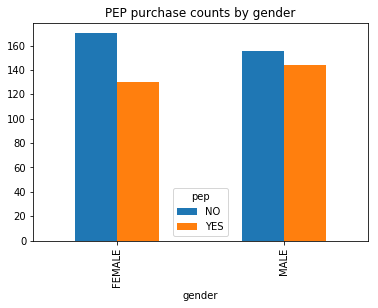

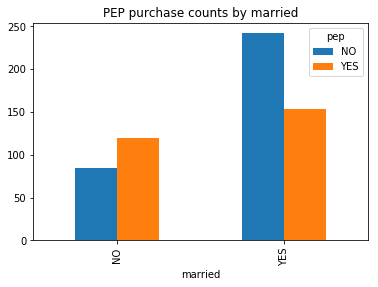

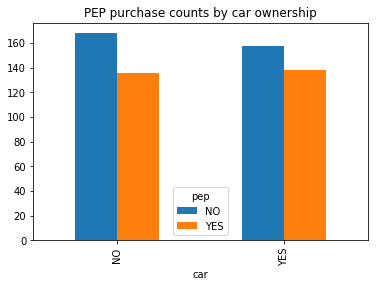

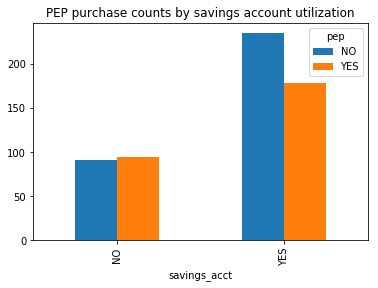

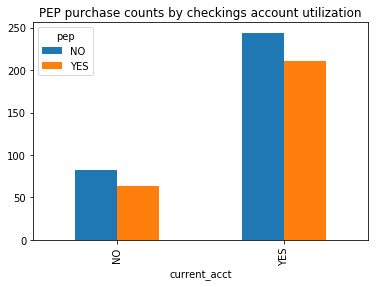

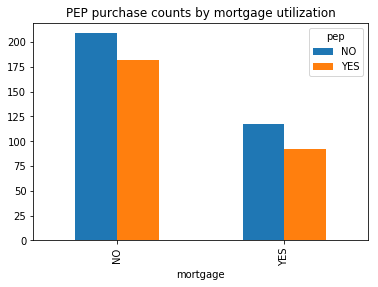

In [9]:
# Other Attributes Distribution by PEP participation

gg1 = pd.crosstab(bank["region"], bank["pep"])
plt.show(gg1.plot(kind="bar",title="PEP purchase counts by region"))

gg2 = pd.crosstab(bank["gender"], bank["pep"])
plt.show(gg2.plot(kind="bar",title="PEP purchase counts by gender"))

gg3 = pd.crosstab(bank["married"], bank["pep"])
plt.show(gg3.plot(kind="bar",title="PEP purchase counts by married"))

gg4 = pd.crosstab(bank["car"], bank["pep"])
plt.show(gg4.plot(kind="bar",title="PEP purchase counts by car ownership"))

gg5 = pd.crosstab(bank["savings_acct"], bank["pep"])
plt.show(gg5.plot(kind="bar",title="PEP purchase counts by savings account utilization"))

gg6 = pd.crosstab(bank["current_acct"], bank["pep"])
plt.show(gg6.plot(kind="bar",title="PEP purchase counts by checkings account utilization"))

gg7 = pd.crosstab(bank["mortgage"], bank["pep"])
plt.show(gg7.plot(kind="bar",title="PEP purchase counts by mortgage utilization"))

In [10]:
#cross tabulation of the region attribute with the pep attribute
gg1

pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


In [11]:
#cross tabulation of the gender attribute with the pep attribute
gg2

pep,NO,YES
gender,,
FEMALE,170,130
MALE,156,144


In [12]:
#cross tabulation of the married attribute with the pep attribute
gg3

pep,NO,YES
married,,
NO,84,120
YES,242,154


In [13]:
#cross tabulation of the car attribute with the pep attribute
gg4

pep,NO,YES
car,,
NO,168,136
YES,158,138


In [14]:
#cross tabulation of the saving account utilization attribute with the pep attribute
gg5

pep,NO,YES
savings_acct,,
NO,91,95
YES,235,179


In [15]:
#cross tabulation of the checking account utilization attribute with the pep attribute
gg6

pep,NO,YES
current_acct,,
NO,82,63
YES,244,211


In [16]:
#cross tabulation of the mortgage utilization attribute with the pep attribute
gg7

pep,NO,YES
mortgage,,
NO,209,182
YES,117,92


Based on Descriptive statistics, we can see that: <br>

- People that buy PEP is generally little older and have more income than people don't buy.
- People that buy PEP usually have one kid while half of people who don't buy PEP have no kids and another half of them have more than one kids which means the distribution of having children in this group of people is skew.

From the cross tabulation above, we can see that: <br>

- More males buy PEP than females. 
- region probably isn't an predictive factor since the region distriution appear similar between the PEP and NO_PEP distributions.
- mortgage probably isn't ana predictive factor either since mortgage utilization distriution appear similar between the PEP and NO_PEP distributions.
- People who are not married seem are more likely buy PEP. We can guess that maybe unmarried people have more money to invest on themselves. 

### 3.Use z-score normalization to standardize the values of the income attribute. [Do not change the original income attribute in the table.]

In [17]:
income_z = (bank["income"] - bank["income"].mean()) / bank["income"].std()
income_z.head(5)

id
ID12101   -0.773523
ID12102    0.198541
ID12103   -0.848766
ID12104   -0.554180
ID12105    1.787071
Name: income, dtype: float64

In [18]:
bank_2 = bank.copy()
bank_2["income-znorm"] = income_z
bank_2.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,income-znorm
id,,,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES,-0.773523
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO,0.198541
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,-0.848766
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO,-0.554180
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO,1.787071


### 4.Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). [Do not change the original age attribute in the table.]

In [19]:
age_bins = pd.qcut(bank.age, 3)
age_bins.head(10)

id
ID12101      (35.0, 49.0]
ID12102      (35.0, 49.0]
ID12103      (49.0, 67.0]
ID12104    (17.999, 35.0]
ID12105      (49.0, 67.0]
ID12106      (49.0, 67.0]
ID12107    (17.999, 35.0]
ID12108      (49.0, 67.0]
ID12109      (35.0, 49.0]
ID12110      (49.0, 67.0]
Name: age, dtype: category
Categories (3, interval[float64]): [(17.999, 35.0] < (35.0, 49.0] < (49.0, 67.0]]

In [20]:
age_bins = pd.qcut(bank.age, [0, .33, .66, 1], labels=["young", "mid-age", "old"])
age_bins.head(10)

id
ID12101    mid-age
ID12102    mid-age
ID12103        old
ID12104      young
ID12105        old
ID12106        old
ID12107      young
ID12108        old
ID12109    mid-age
ID12110        old
Name: age, dtype: category
Categories (3, object): [young < mid-age < old]

In [21]:
bank_2["age-bins"] = age_bins
bank_2.head(10)

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,income-znorm,age-bins
id,,,,,,,,,,,,,
ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES,-0.773523,mid-age
ID12102,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO,0.198541,mid-age
ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,-0.848766,old
ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO,-0.554180,young
ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO,1.787071,old
ID12106,57,37869.60,2,FEMALE,TOWN,YES,NO,YES,YES,NO,YES,0.802015,old
ID12107,22,8877.07,0,MALE,RURAL,NO,NO,NO,YES,NO,YES,-1.445560,young
ID12108,58,24946.60,0,MALE,TOWN,YES,YES,YES,YES,NO,NO,-0.199809,old
ID12109,37,25304.30,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO,-0.172079,mid-age


### 5. Use Min-Max Normalization to transform the values of all numeric attributes  (income, age, children) in the original table (before the transforamtions in parts 3 and 4 above) onto the range 0.0-1.0.

In [22]:
#transform income 
min_sal = bank["income"].min()
max_sal = bank["income"].max()
norm_sal = (bank["income"] - min_sal) / (max_sal-min_sal)
bank["income"] = norm_sal
#transform age
min_age = bank["age"].min()
max_age = bank["age"].max()
norm_age = (bank["age"] - min_age) / (max_age-min_age)
bank["age"] = norm_age
#transform children
min_ch = bank["children"].min()
max_ch = bank["children"].max()
norm_ch = (bank["children"] - min_ch) / (max_ch-min_ch)
bank["children"] = norm_ch
print bank.head(10)

              age    income  children  gender      region married  car  \
id                                                                       
ID12101  0.612245  0.215634  0.333333  FEMALE  INNER_CITY      NO   NO   
ID12102  0.448980  0.431395  1.000000    MALE        TOWN     YES  YES   
ID12103  0.673469  0.198933  0.000000  FEMALE  INNER_CITY     YES  YES   
ID12104  0.102041  0.264320  1.000000  FEMALE        TOWN     YES   NO   
ID12105  0.795918  0.783987  0.000000  FEMALE       RURAL     YES   NO   
ID12106  0.795918  0.565343  0.666667  FEMALE        TOWN     YES   NO   
ID12107  0.081633  0.066468  0.000000    MALE       RURAL      NO   NO   
ID12108  0.816327  0.342977  0.000000    MALE        TOWN     YES  YES   
ID12109  0.387755  0.349132  0.666667  FEMALE    SUBURBAN     YES  YES   
ID12110  0.734694  0.330338  0.666667    MALE        TOWN     YES  YES   

        savings_acct current_acct mortgage  pep  
id                                               
ID12101    

### 6. Convert the table (after normalization in part 5) into the standard spreadsheet format. Save this new table into a file called bank_numeric.csv and submit it along with your assignment. 

In [23]:
bank_ssf = pd.get_dummies(bank, columns = ["gender","region","married","car","savings_acct","current_acct","mortgage","pep"])
bank_ssf.head(10)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
id,,,,,,,,,,,,,,,,,,,,,
ID12101,0.612245,0.215634,0.333333,1,0,1,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
ID12102,0.448980,0.431395,1.000000,0,1,0,0,0,1,0,...,0,1,1,0,0,1,0,1,1,0
ID12103,0.673469,0.198933,0.000000,1,0,1,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
ID12104,0.102041,0.264320,1.000000,1,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,0
ID12105,0.795918,0.783987,0.000000,1,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0
ID12106,0.795918,0.565343,0.666667,1,0,0,0,0,1,0,...,1,0,0,1,0,1,1,0,0,1
ID12107,0.081633,0.066468,0.000000,0,1,0,1,0,0,1,...,1,0,1,0,0,1,1,0,0,1
ID12108,0.816327,0.342977,0.000000,0,1,0,0,0,1,0,...,0,1,0,1,0,1,1,0,1,0
ID12109,0.387755,0.349132,0.666667,1,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0


In [24]:
#save a new table in file
bank_ssf.to_csv("Bank_Numeric.csv", float_format="%1.4f")

### 7. Using the standardized data set (of the previous part), perform basic correlation analysis among the attributes. Discuss your results.

In [25]:
#correlation matrix of bank dataset
bank_ssf.corr()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
age,1.000000,0.752726,0.023572,0.090081,-0.090081,-0.025171,0.018635,0.031345,-0.008510,-0.010394,...,-0.077733,0.077733,-0.184389,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.173825,0.173825
income,0.752726,1.000000,0.036761,0.023845,-0.023845,-0.047564,0.084776,0.029824,-0.036431,0.008386,...,-0.081556,0.081556,-0.266164,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991
children,0.023572,0.036761,1.000000,0.014206,-0.014206,-0.051222,0.089902,-0.014122,-0.007033,0.048716,...,-0.036455,0.036455,-0.041536,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.057663,-0.057663
gender_FEMALE,0.090081,0.023845,0.014206,1.000000,-1.000000,-0.023459,-0.009092,-0.010951,0.040472,0.021110,...,0.006667,-0.006667,0.007207,-0.007207,-0.019466,0.019466,0.066465,-0.066465,0.046843,-0.046843
gender_MALE,-0.090081,-0.023845,-0.014206,-1.000000,1.000000,0.023459,0.009092,0.010951,-0.040472,-0.021110,...,-0.006667,0.006667,-0.007207,0.007207,0.019466,-0.019466,-0.066465,0.066465,-0.046843,0.046843
region_INNER_CITY,-0.025171,-0.047564,-0.051222,-0.023459,0.023459,1.000000,-0.393444,-0.306032,-0.573814,-0.003254,...,0.018143,-0.018143,0.091373,-0.091373,-0.007894,0.007894,-0.002098,0.002098,-0.001054,0.001054
region_RURAL,0.018635,0.084776,0.089902,-0.009092,0.009092,-0.393444,1.000000,-0.148158,-0.277798,0.022649,...,-0.024006,0.024006,-0.036960,0.036960,0.008496,-0.008496,0.051908,-0.051908,-0.019714,0.019714
region_SUBURBAN,0.031345,0.029824,-0.014122,-0.010951,0.010951,-0.306032,-0.148158,1.000000,-0.216080,-0.012483,...,0.061184,-0.061184,-0.002605,0.002605,-0.038157,0.038157,-0.004635,0.004635,-0.062508,0.062508
region_TOWN,-0.008510,-0.036431,-0.007033,0.040472,-0.040472,-0.573814,-0.277798,-0.216080,1.000000,-0.006369,...,-0.041604,0.041604,-0.068654,0.068654,0.027431,-0.027431,-0.036591,0.036591,0.059115,-0.059115
married_NO,-0.010394,0.008386,0.048716,0.021110,-0.021110,-0.003254,0.022649,-0.012483,-0.006369,1.000000,...,-0.009571,0.009571,0.028604,-0.028604,-0.059996,0.059996,-0.021711,0.021711,-0.189578,0.189578


Based on correlation matrix above, we can see that there is only a strong positive correlation relationship between age and income which is about 0.75. Other attributes show trivial correlation relationships with small correlation coefficient between each other, like 'age' and 'children',  or are mutually exclusive, like 'region_Town' and 'region_Inner_city', which don't provide any valuable insights even they have little better coefficients.

### 8. Using Matplotlib library and/or ploting capabilties of Pandas, create a scatter plot of the (non-normalized) Income attribute relative to Age. Be sure that your plot contains appropriate labels for the axes. Do these variables seem correlated?

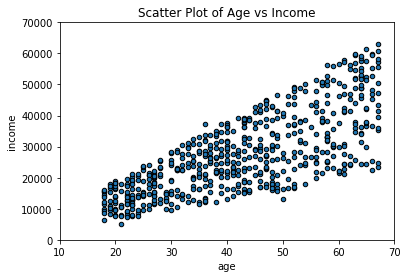

In [26]:
# Scatter Plot of Age vs Income
bank_2.plot(x="age", y="income", kind="scatter", edgecolor="k",ylim=(0,70000), xlim=(10,70),title = "Scatter Plot of Age vs Income")

Yes, there is a strong positive correlation between age and income.

### 9. Create histograms for (non-normalized) Income (using 9 bins) and Age (using 15 bins)

Text(0,0.5,u'Count')

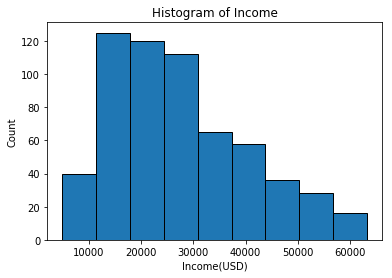

In [27]:
#Income histogram
bank_2["income"].plot(kind="hist", bins=9,edgecolor = 'k',title = "Histogram of Income")
plt.xlabel('Income(USD)')
plt.ylabel('Count')

Text(0,0.5,u'Count')

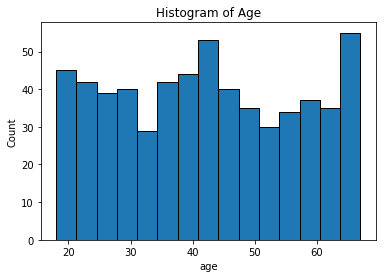

In [28]:
#Age histogram
bank_2["age"].plot(kind="hist", bins=15,edgecolor = 'k',title = "Histogram of Age")
plt.xlabel('age')
plt.ylabel('Count')

### 10.Using a bargraph, plot the distribution of the values of the region attribute.

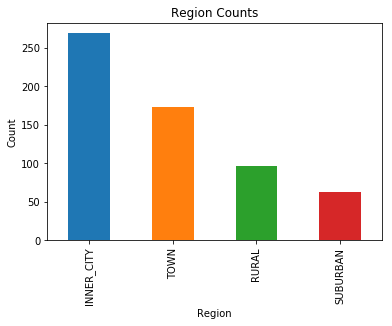

In [29]:
temp2=bank["region"].value_counts().plot(kind='bar',title='Region Counts')
plt.xlabel('Region')
plt.ylabel('Count')
temp2

### 11.Perform a cross-tabulation of the region attribute with the pep attribute.

In [30]:
gg = pd.crosstab(bank_2["region"], bank_2["pep"])
gg

pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


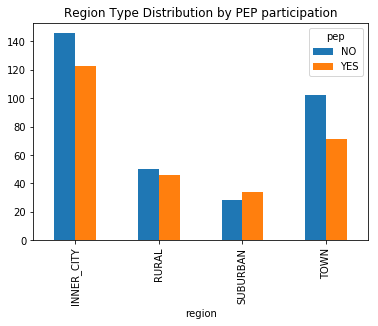

In [31]:
plt.show(gg.plot(kind="bar",title="Region Type Distribution by PEP participation"))